In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df = pd.read_csv('hr.csv')
print(df.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
# Analyze turnover records
turnover_rate = df['Attrition'].value_counts(normalize=True) * 100
print(f'Turnover Rate:\n{turnover_rate}')


Turnover Rate:
No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64


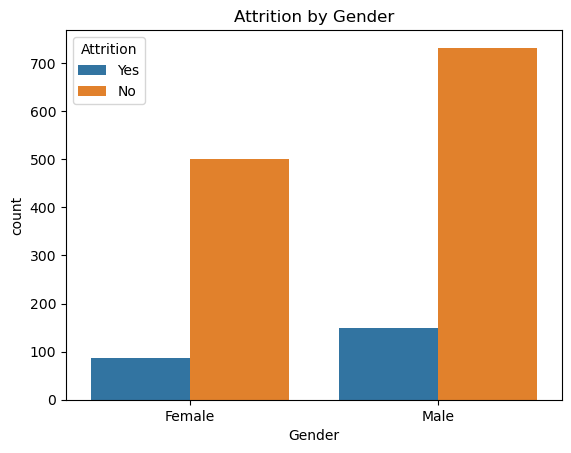

Attrition         No        Yes
Gender                         
Female     85.204082  14.795918
Male       82.993197  17.006803


In [6]:
# Explore employee demographics
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Attrition by Gender')
plt.show()
travel_counts = df.groupby(['Gender', 'Attrition']).size().unstack().fillna(0)

travel_percentages = travel_counts.div(travel_counts.sum(axis=1), axis=0) * 100

print(travel_percentages)


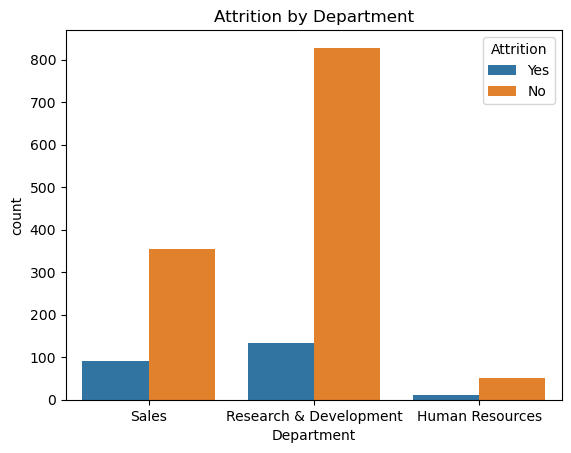

Attrition                      No        Yes
Department                                  
Human Resources         80.952381  19.047619
Research & Development  86.160250  13.839750
Sales                   79.372197  20.627803


In [7]:
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition by Department')
plt.show()
travel_counts = df.groupby(['Department', 'Attrition']).size().unstack().fillna(0)

travel_percentages = travel_counts.div(travel_counts.sum(axis=1), axis=0) * 100

print(travel_percentages)



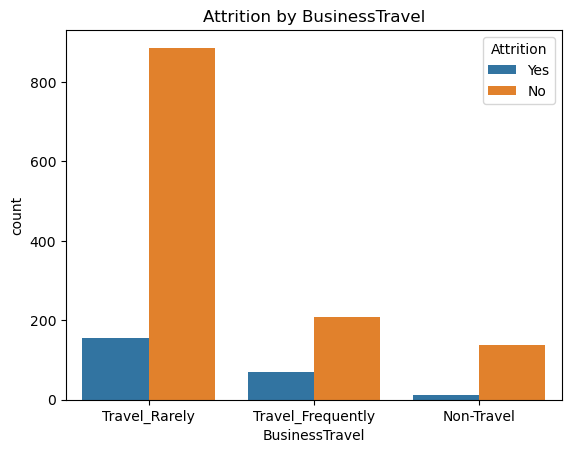

Percentage of 'Yes' and 'No' for each level of BusinessTravel:
Attrition                 No        Yes
BusinessTravel                         
Non-Travel         92.000000   8.000000
Travel_Frequently  75.090253  24.909747
Travel_Rarely      85.043145  14.956855


In [8]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=df)
plt.title('Attrition by BusinessTravel')
plt.show()
travel_counts = df.groupby(['BusinessTravel', 'Attrition']).size().unstack().fillna(0)

travel_percentages = travel_counts.div(travel_counts.sum(axis=1), axis=0) * 100

print("Percentage of 'Yes' and 'No' for each level of BusinessTravel:")
print(travel_percentages)

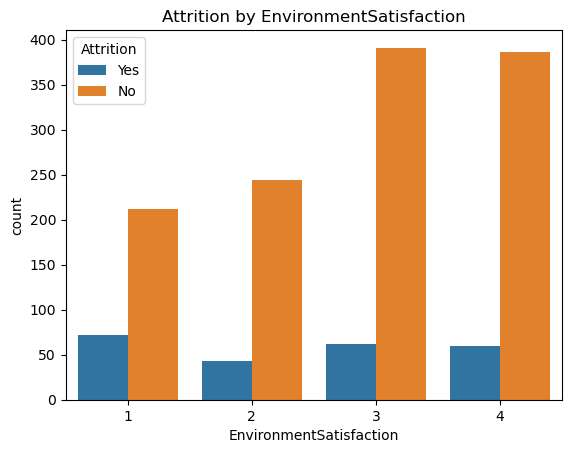

Percentage of 'Yes' and 'No' for each level of EnvironmentSatisfaction:
Attrition                       No        Yes
EnvironmentSatisfaction                      
1                        74.647887  25.352113
2                        85.017422  14.982578
3                        86.313466  13.686534
4                        86.547085  13.452915


In [9]:
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df)
plt.title('Attrition by EnvironmentSatisfaction')
plt.show()
satisfaction_counts = df.groupby(['EnvironmentSatisfaction', 'Attrition']).size().unstack().fillna(0)

satisfaction_percentages = satisfaction_counts.div(satisfaction_counts.sum(axis=1), axis=0) * 100

print("Percentage of 'Yes' and 'No' for each level of EnvironmentSatisfaction:")
print(satisfaction_percentages)

In [10]:
travel_counts = df.groupby(['JobRole', 'Attrition']).size().unstack().fillna(0)

travel_percentages = travel_counts.div(travel_counts.sum(axis=1), axis=0) * 100

print("Percentage of 'Yes' and 'No' for each level of jobrole:")
print(travel_percentages)

Percentage of 'Yes' and 'No' for each level of jobrole:
Attrition                         No        Yes
JobRole                                        
Healthcare Representative  93.129771   6.870229
Human Resources            76.923077  23.076923
Laboratory Technician      76.061776  23.938224
Manager                    95.098039   4.901961
Manufacturing Director     93.103448   6.896552
Research Director          97.500000   2.500000
Research Scientist         83.904110  16.095890
Sales Executive            82.515337  17.484663
Sales Representative       60.240964  39.759036


In [11]:
travel_counts = df.groupby(['JobSatisfaction', 'Attrition']).size().unstack().fillna(0)

travel_percentages = travel_counts.div(travel_counts.sum(axis=1), axis=0) * 100

print("Percentage of 'Yes' and 'No' for each level of jobsatisfaction:")
print(travel_percentages)

Percentage of 'Yes' and 'No' for each level of jobsatisfaction:
Attrition               No        Yes
JobSatisfaction                      
1                77.162630  22.837370
2                83.571429  16.428571
3                83.484163  16.515837
4                88.671024  11.328976


In [12]:
travel_counts = df.groupby(['OverTime', 'Attrition']).size().unstack().fillna(0)

travel_percentages = travel_counts.div(travel_counts.sum(axis=1), axis=0) * 100

print("Percentage of 'Yes' and 'No' for each level of overtime:")
print(travel_percentages)

Percentage of 'Yes' and 'No' for each level of overtime:
Attrition         No        Yes
OverTime                       
No         89.563567  10.436433
Yes        69.471154  30.528846


In [13]:
travel_counts = df.groupby(['WorkLifeBalance', 'Attrition']).size().unstack().fillna(0)

travel_percentages = travel_counts.div(travel_counts.sum(axis=1), axis=0) * 100

print("Percentage of 'Yes' and 'No' for each level of worklifebalance:")
print(travel_percentages)

Percentage of 'Yes' and 'No' for each level of worklifebalance:
Attrition               No        Yes
WorkLifeBalance                      
1                68.750000  31.250000
2                83.139535  16.860465
3                85.778275  14.221725
4                82.352941  17.647059


/var/folders/ww/4b2ck_9d5g12lqdv8qqbbv9h0000gn/T/ipykernel_769/3645301943.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


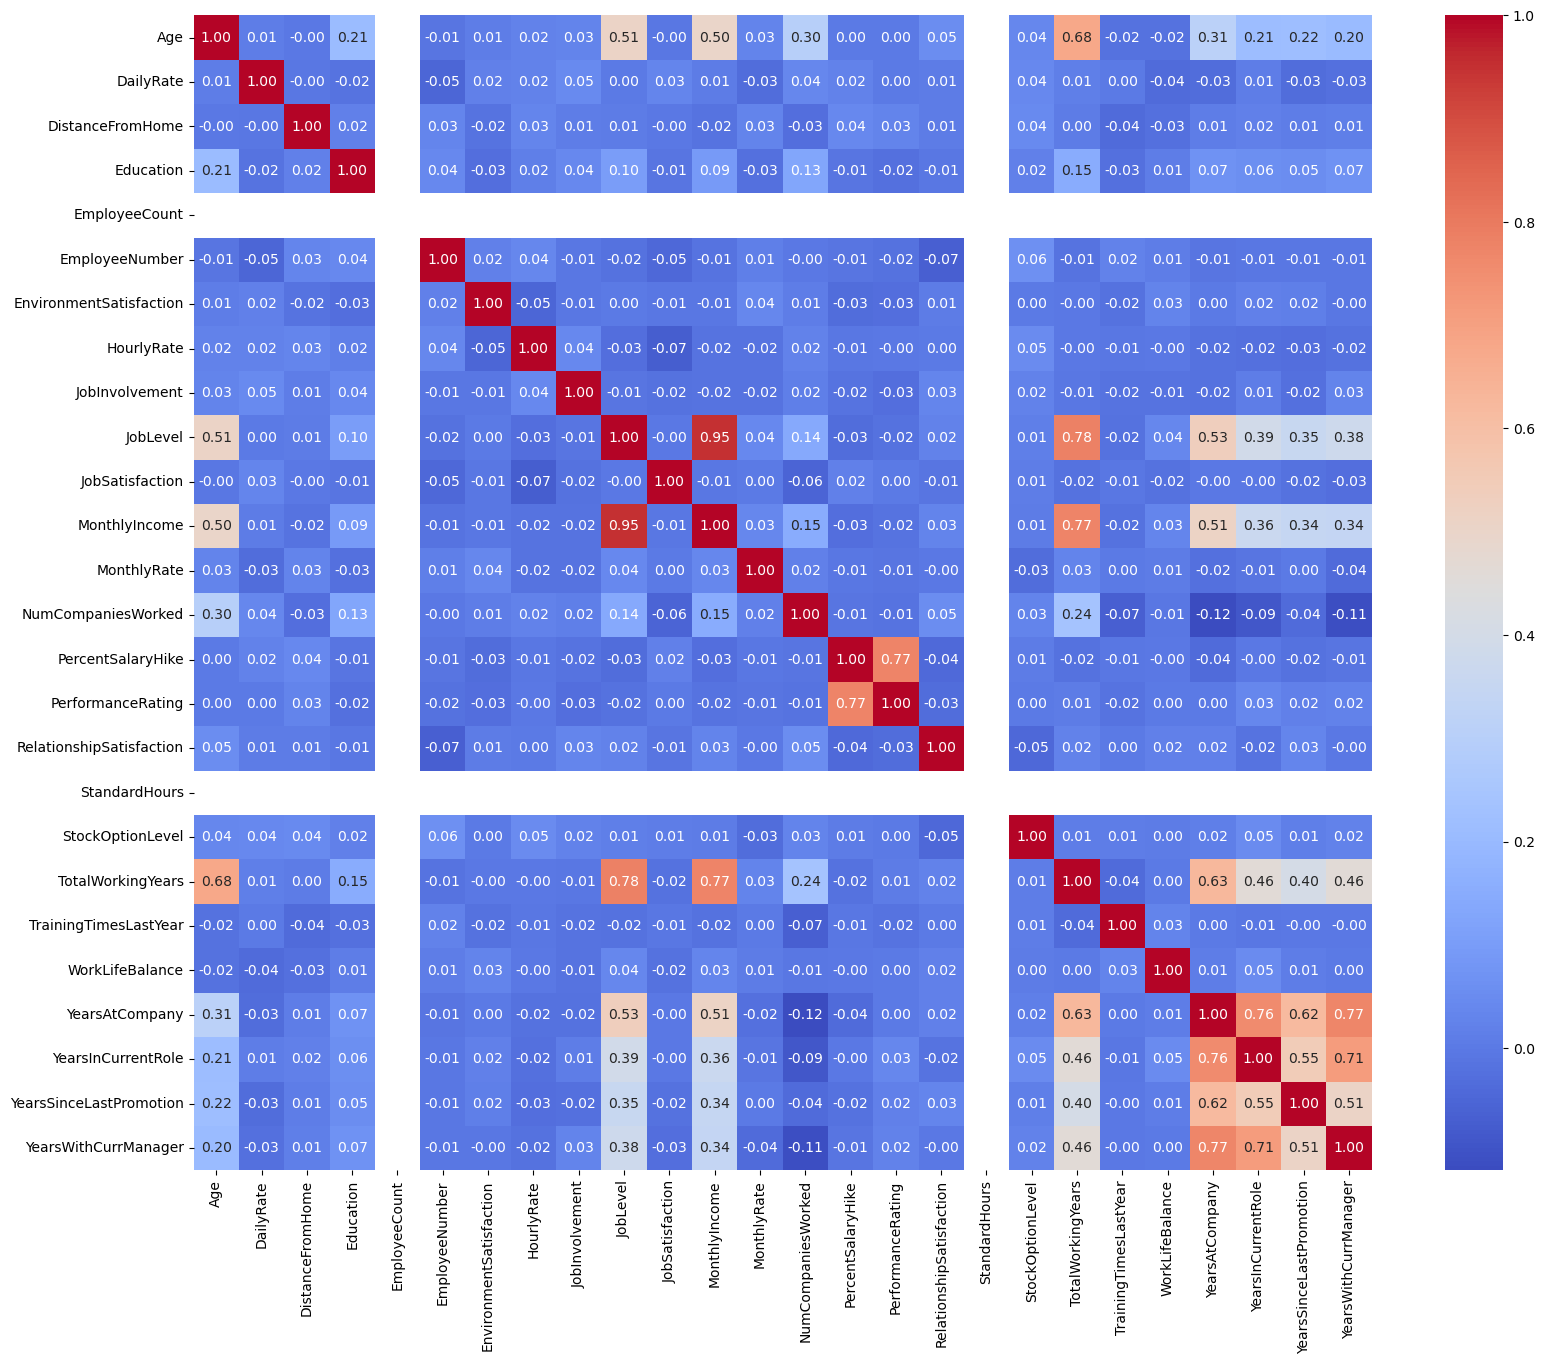

In [14]:
correlation_matrix = df.corr()
plt.figure(figsize=(19, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [15]:
#pip install plotnine


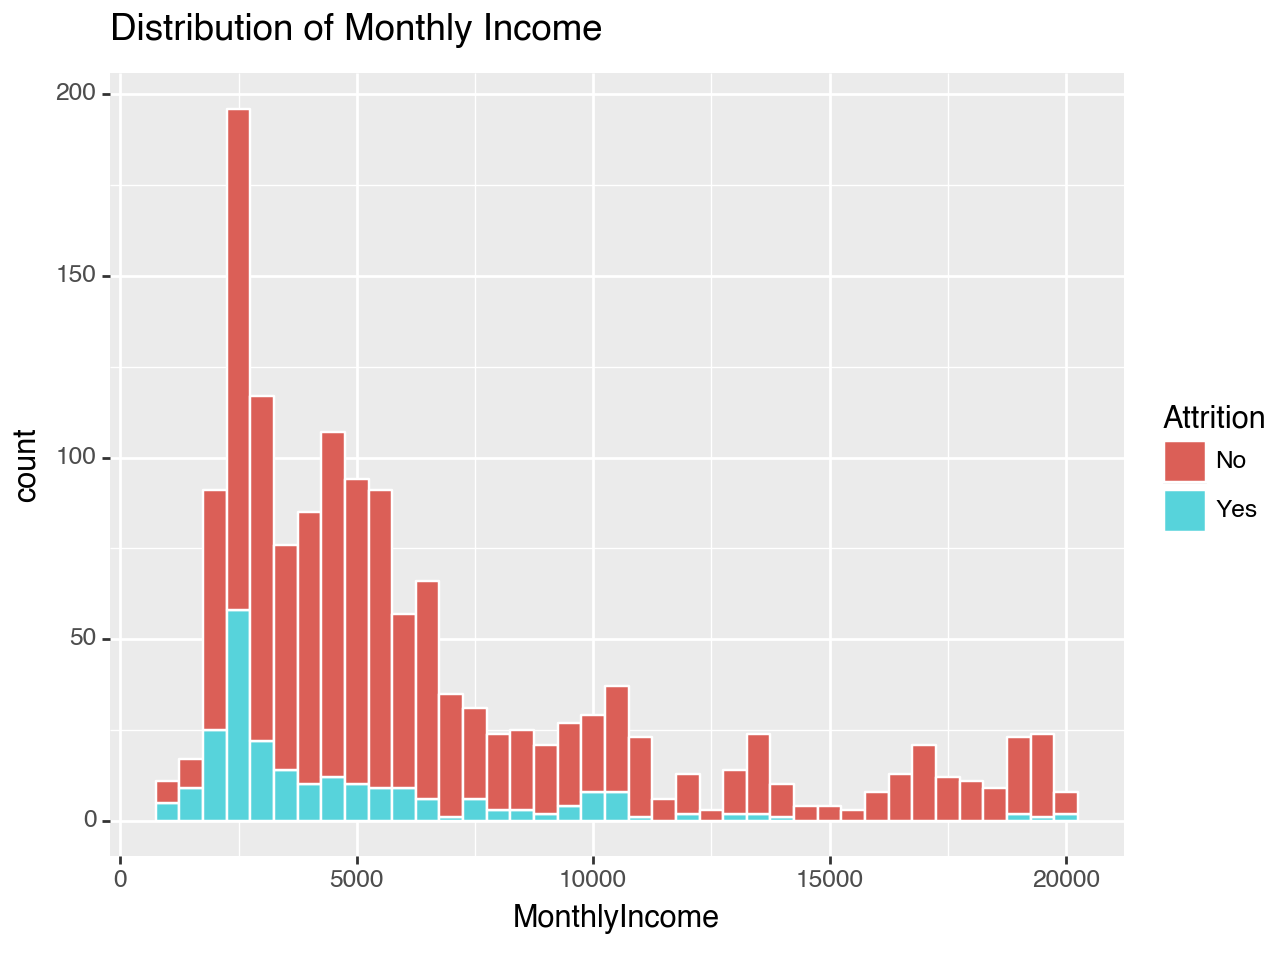

<Figure Size: (640 x 480)>

In [16]:
from plotnine import ggplot, aes, geom_histogram, labs
(ggplot(df, aes(x='MonthlyIncome', fill='Attrition')) +
 geom_histogram(binwidth=500, position='stack', color='white') +
 labs(title='Distribution of Monthly Income'))

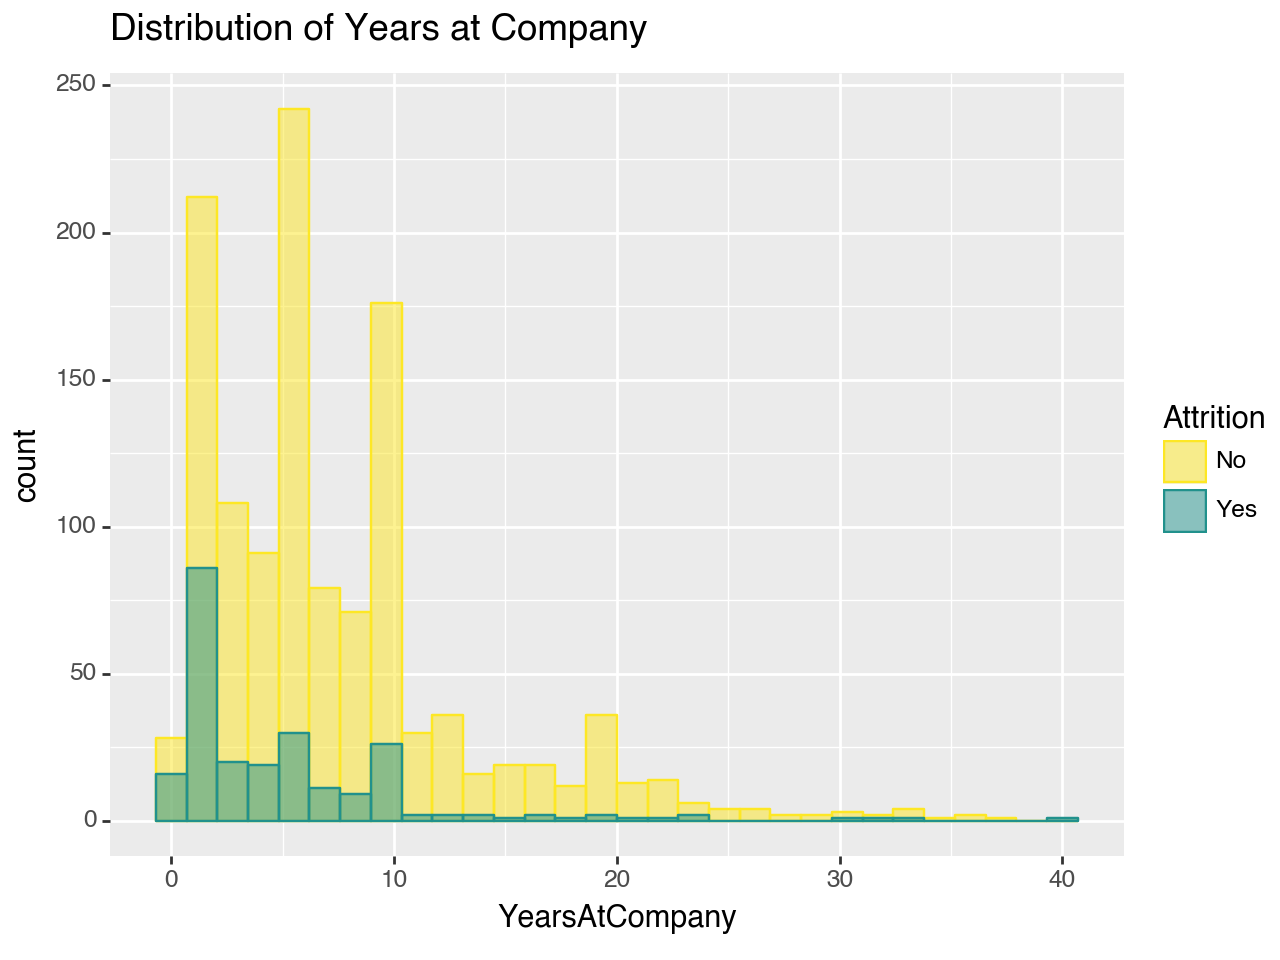

In [17]:
from plotnine import ggplot, aes, geom_histogram, labs, scale_color_manual, scale_fill_manual

plot = (ggplot(df, aes(x='YearsAtCompany', fill='Attrition', color='Attrition')) +
        geom_histogram(position='identity', alpha=0.5, bins=30) +
        labs(title='Distribution of Years at Company') +
        scale_color_manual(values=['#fde725', '#21918c']) +
        scale_fill_manual(values=['#fde725', '#21918c']))

print(plot)

In [18]:
import pandas as pd

# Assuming df is your DataFrame
# Convert 'Attrition' column to numeric (assuming 'Yes' as 1 and 'No' as 0)
df['Attrition_numeric'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64']).columns

# Calculate correlation coefficients with Attrition
correlations = df[numeric_columns].corrwith(df['Attrition_numeric'])

# Sort correlations in descending order
sorted_correlations = correlations.abs().sort_values(ascending=False)

# Display the results
print("Correlation with Attrition:")
print(sorted_correlations)

# Drop the temporary column
df.drop('Attrition_numeric', axis=1, inplace=True)


Correlation with Attrition:
Attrition_numeric           1.000000
TotalWorkingYears           0.171063
JobLevel                    0.169105
YearsInCurrentRole          0.160545
MonthlyIncome               0.159840
Age                         0.159205
YearsWithCurrManager        0.156199
StockOptionLevel            0.137145
YearsAtCompany              0.134392
JobInvolvement              0.130016
JobSatisfaction             0.103481
EnvironmentSatisfaction     0.103369
DistanceFromHome            0.077924
WorkLifeBalance             0.063939
TrainingTimesLastYear       0.059478
DailyRate                   0.056652
RelationshipSatisfaction    0.045872
NumCompaniesWorked          0.043494
YearsSinceLastPromotion     0.033019
Education                   0.031373
MonthlyRate                 0.015170
PercentSalaryHike           0.013478
EmployeeNumber              0.010577
HourlyRate                  0.006846
PerformanceRating           0.002889
EmployeeCount                    NaN
StandardHo

In [19]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame
categorical_variables = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Variable', 'Chi2 Value', 'P-value', 'Statistical Significance'])

# Loop through each categorical variable and perform chi-square test
for variable in categorical_variables:
    contingency_table = pd.crosstab(df[variable], df['Attrition'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Store results in the DataFrame
    results_df = results_df.append({
        'Variable': variable,
        'Chi2 Value': chi2,
        'P-value': p,
        'Statistical Significance': 'Yes' if p < 0.05 else 'No'
    }, ignore_index=True)

# Display the summary table
print(results_df)


         Variable  Chi2 Value       P-value Statistical Significance
0  BusinessTravel   24.182414  5.608614e-06                      Yes
1      Department   10.796007  4.525607e-03                      Yes
2  EducationField   16.024674  6.773980e-03                      Yes
3          Gender    1.116967  2.905724e-01                       No
4         JobRole   86.190254  2.752482e-15                      Yes
5   MaritalStatus   46.163677  9.455511e-11                      Yes
6          Over18    0.000000  1.000000e+00                       No
7        OverTime   87.564294  8.158424e-21                      Yes


/var/folders/ww/4b2ck_9d5g12lqdv8qqbbv9h0000gn/T/ipykernel_769/1234246192.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/var/folders/ww/4b2ck_9d5g12lqdv8qqbbv9h0000gn/T/ipykernel_769/1234246192.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/var/folders/ww/4b2ck_9d5g12lqdv8qqbbv9h0000gn/T/ipykernel_769/1234246192.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/var/folders/ww/4b2ck_9d5g12lqdv8qqbbv9h0000gn/T/ipykernel_769/1234246192.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/var/folders/ww/4b2ck_9d5g12lqdv8qqbbv9h0000gn/T/ipykernel_769/1234246192.py:16: FutureWarning: The frame.append method is deprecated and will b

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_encoded = pd.get_dummies(X)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_encoded, y)

rf_varimp = rf_model.feature_importances_

imp_df = pd.DataFrame({'variable': X_encoded.columns, 'importance': rf_varimp})

print(imp_df)


                             variable  importance
0                                 Age    0.053894
1                           DailyRate    0.051599
2                    DistanceFromHome    0.041125
3                           Education    0.017605
4                       EmployeeCount    0.000000
5                      EmployeeNumber    0.044690
6             EnvironmentSatisfaction    0.025198
7                          HourlyRate    0.040376
8                      JobInvolvement    0.020719
9                            JobLevel    0.020677
10                    JobSatisfaction    0.023479
11                      MonthlyIncome    0.066910
12                        MonthlyRate    0.045793
13                 NumCompaniesWorked    0.032852
14                  PercentSalaryHike    0.030890
15                  PerformanceRating    0.005558
16           RelationshipSatisfaction    0.020391
17                      StandardHours    0.000000
18                   StockOptionLevel    0.025881
